In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

In [48]:
from sklearn import datasets

cancer=datasets.load_breast_cancer()
#only take two features
X=cancer.data[:,:4]
y=cancer.target

#defines malignent and benign x (data) values based on y values
malignent=cancer.data[y==1]
benign=cancer.data[y==0]

In [49]:
BC_dataframe = pd.DataFrame(X, columns=cancer.feature_names[:4])

In [50]:
display(BC_dataframe[:10])

,mean radius,mean texture,mean perimeter,mean area
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0
5,12.45,15.70,82.57,477.1
6,18.25,19.98,119.60,1040.0
7,13.71,20.83,90.20,577.9
8,13.00,21.82,87.50,519.8
9,12.46,24.04,83.97,475.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0c4777400>,
      dtype=object)

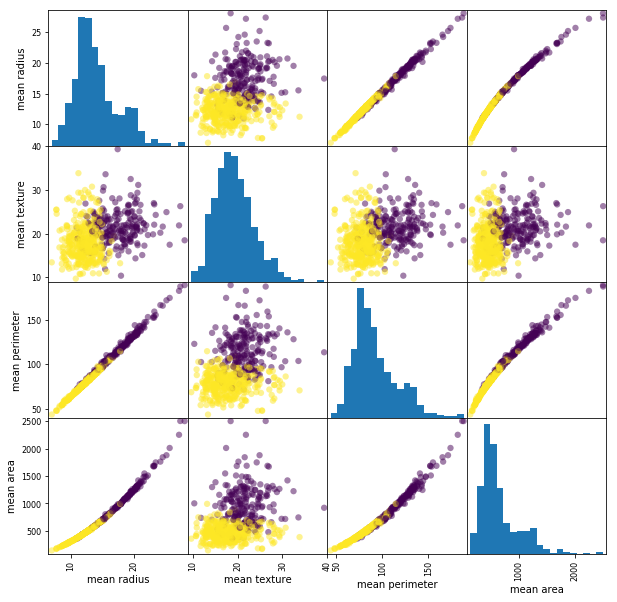

In [55]:
pd.plotting.scatter_matrix(BC_dataframe, c=y, figsize=(10,10),
                        marker='o', hist_kwds={'bins':20},s=40,
                        alpha=.5)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [4]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(X_train)
#X_train = sc.transform(X_train)
#X_test = sc.transform(X_test)

In [5]:
#defines malignent and benign x (data) values based on y values
malignent=X_train[y_train==1]
benign=X_train[y_train==0]

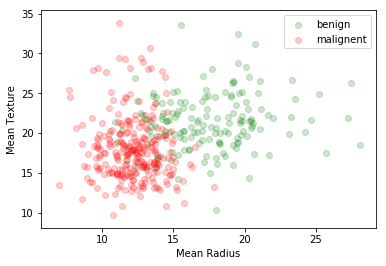

In [6]:
xb,yb=benign[:,0],benign[:,1]
xm,ym=malignent[:,0],malignent[:,1]
plt.scatter(xb,yb,color='g',alpha=0.2,label='benign')
plt.scatter(xm,ym,color='r',alpha=0.2,label='malignent')
plt.legend()
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.savefig('cancer.png')

In [7]:
class LinearPerceptron:
    def __init__(self,eta,nepochs):
        self.eta = eta
        self.nepochs = nepochs
        
    def activation(self,xdata,index):
        return np.dot(self.weights[1:],xdata[index]) + self.weights[0]
    
    def fit(self,xtrain,ytrain):
        self.weights = np.random.rand(len(xtrain[0])+1)
        for j in range(self.nepochs):
            for i in range(len(xtrain)):
                ypred = 0
                if self.activation(xtrain,i) >= 0:
                    ypred = 1
                self.weights[0] += self.eta*(ytrain[i] - ypred)
                self.weights[1:] += self.eta*(ytrain[i] - ypred)*xtrain[i]
        return self
    
    def predict(self,xtest):
        ypred = np.zeros((len(xtest)))
        for i in range(len(xtest)):
            if self.activation(xtest,i) >= 0:
                ypred[i] = 1
        return ypred

In [8]:
ppn = LinearPerceptron(0.1,40)

In [36]:
ppn.fit(X,y)

In [37]:
y_pred = ppn.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.88


In [38]:
def regions(X, y, classifier,colors,resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    xb,yb=benign[:,0],benign[:,1]
    xm,ym=malignent[:,0],malignent[:,1]
    plt.scatter(xb,yb,color='g',alpha=0.2)
    plt.scatter(xm,ym,color='r',alpha=0.2)
    plt.xlabel("Mean Radius")
    plt.ylabel("Mean Texture")
    plt.savefig('cancerRegions.png')

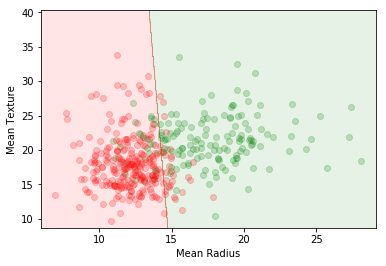

In [39]:
regions(X, y, ppn, ['green','red'],resolution=0.02)